In [1]:
import sys
sys.path.append(sys.path[0] + '/deepkexpfam')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from utils import load_object
from utils import make_grid_data, plot_flow2D, plot_object2D
from flows import ObjectDataset, MLPLayers, AdditiveCouplingLayers, Flow

from Datasets import Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring

%matplotlib inline

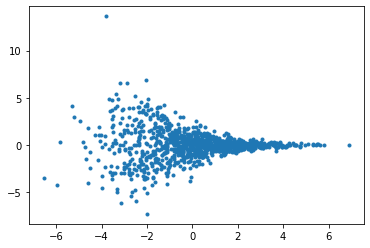

In [3]:
obj = Funnel()
X = obj.sample(1000)
plt.plot(X[:, 0], X[:, 1], '.')

In [4]:
# Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring
#save_path = './saved_flows_additive_limit_data/'

d = 1
D = 2
layers = 20

sample_size = 5000
batch_size = 100
epochs = 200
lr = 0.001
weight_decay = 0.01

names = ['Funnel', 'Banana', 'Ring', 'Uniform', 'Cosine', 'Grid', 'Multiring']
objs = [Funnel(), Banana(), Ring(), Uniform(), Cosine(), Grid(), Multiring()]

In [5]:
# Train flows
flows = []
for obj in objs:
    while True:
        try:
            flow = Flow(d, D, layers, coupling_layers='additive')
            flow.train(obj, sample_size, batch_size, epochs, lr, weight_decay, show_progress=True)
            flows.append(flow)
        except ValueError:
            print('Value error')
        except RuntimeError:
            print('Runtime error')
        else:
            break

# load flows
# i = 2
# flows = []
# for name in names:
#     flow = load_object(save_path+name+str(i))
#     flows.append(flow)

epoch = 1, log_like = -19123.45117
epoch = 11, log_like = -17947.42969
epoch = 21, log_like = -17701.67188
epoch = 31, log_like = -17769.08203
epoch = 41, log_like = -17771.61914
epoch = 51, log_like = -17742.63867
epoch = 61, log_like = -17550.95312
epoch = 71, log_like = -17627.63086
epoch = 81, log_like = -17448.09375
epoch = 91, log_like = -17719.08008
epoch = 101, log_like = -17755.24414
epoch = 111, log_like = -17613.43750
epoch = 121, log_like = -17516.76953
epoch = 131, log_like = -17562.17188
epoch = 141, log_like = -17622.78711
epoch = 151, log_like = -17704.21289
epoch = 161, log_like = -17534.16016
epoch = 171, log_like = -17517.23438
epoch = 181, log_like = -17588.50391
epoch = 191, log_like = -17744.81055
epoch = 1, log_like = -64974.29688
epoch = 11, log_like = -18654.58008
epoch = 21, log_like = -18073.30078
epoch = 31, log_like = -17894.17578
epoch = 41, log_like = -17747.22656
epoch = 51, log_like = -17625.68359
epoch = 61, log_like = -17813.07812
epoch = 71, log_like

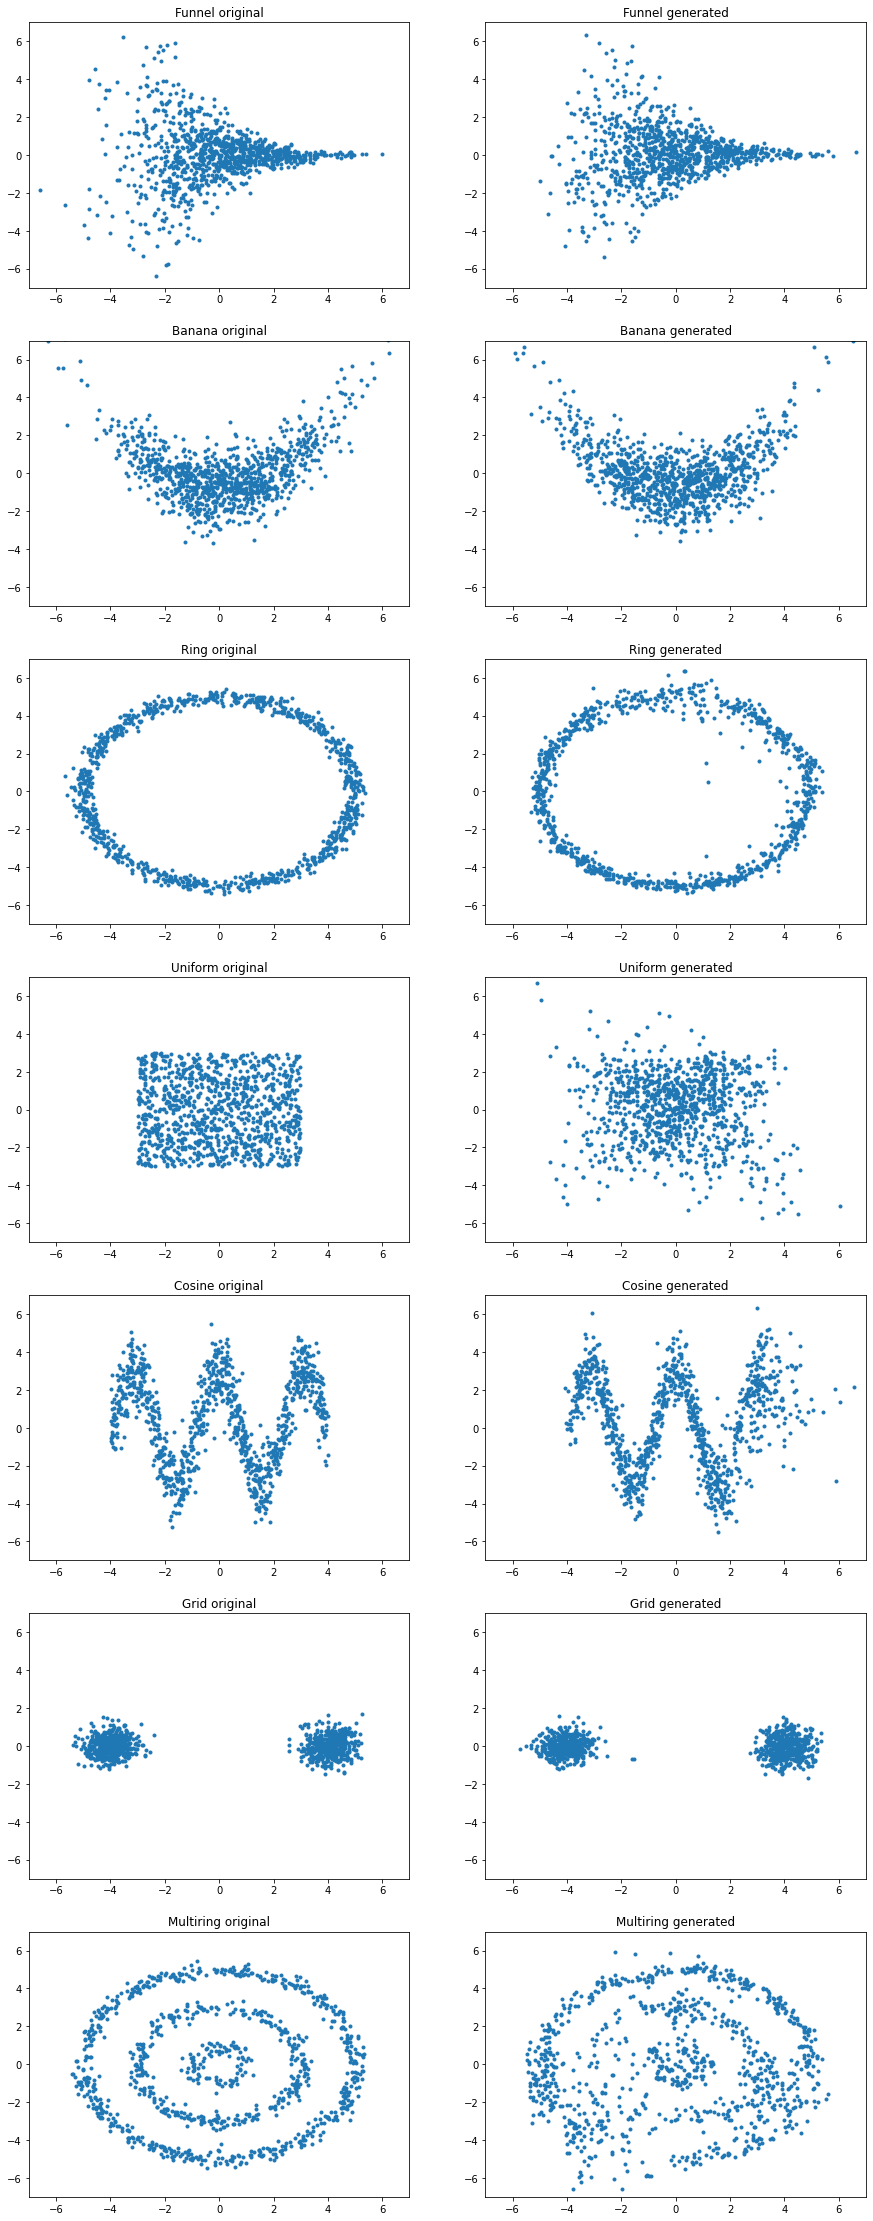

In [6]:
plt.figure(figsize=(15, 40))
for i in range(len(names)):
    name = names[i]
    obj = objs[i]
    flow = flows[i]
    
    X_obj = obj.sample(1000)
    
    plt.subplot(7, 2, 2*i+1)
    plt.plot(X_obj[:, 0], X_obj[:, 1], '.')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' original')

    X_flow = flow.sample(1000)

    plt.subplot(7, 2, 2*i+2)
    plt.plot(X_flow[:, 0], X_flow[:, 1], '.')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' generated')

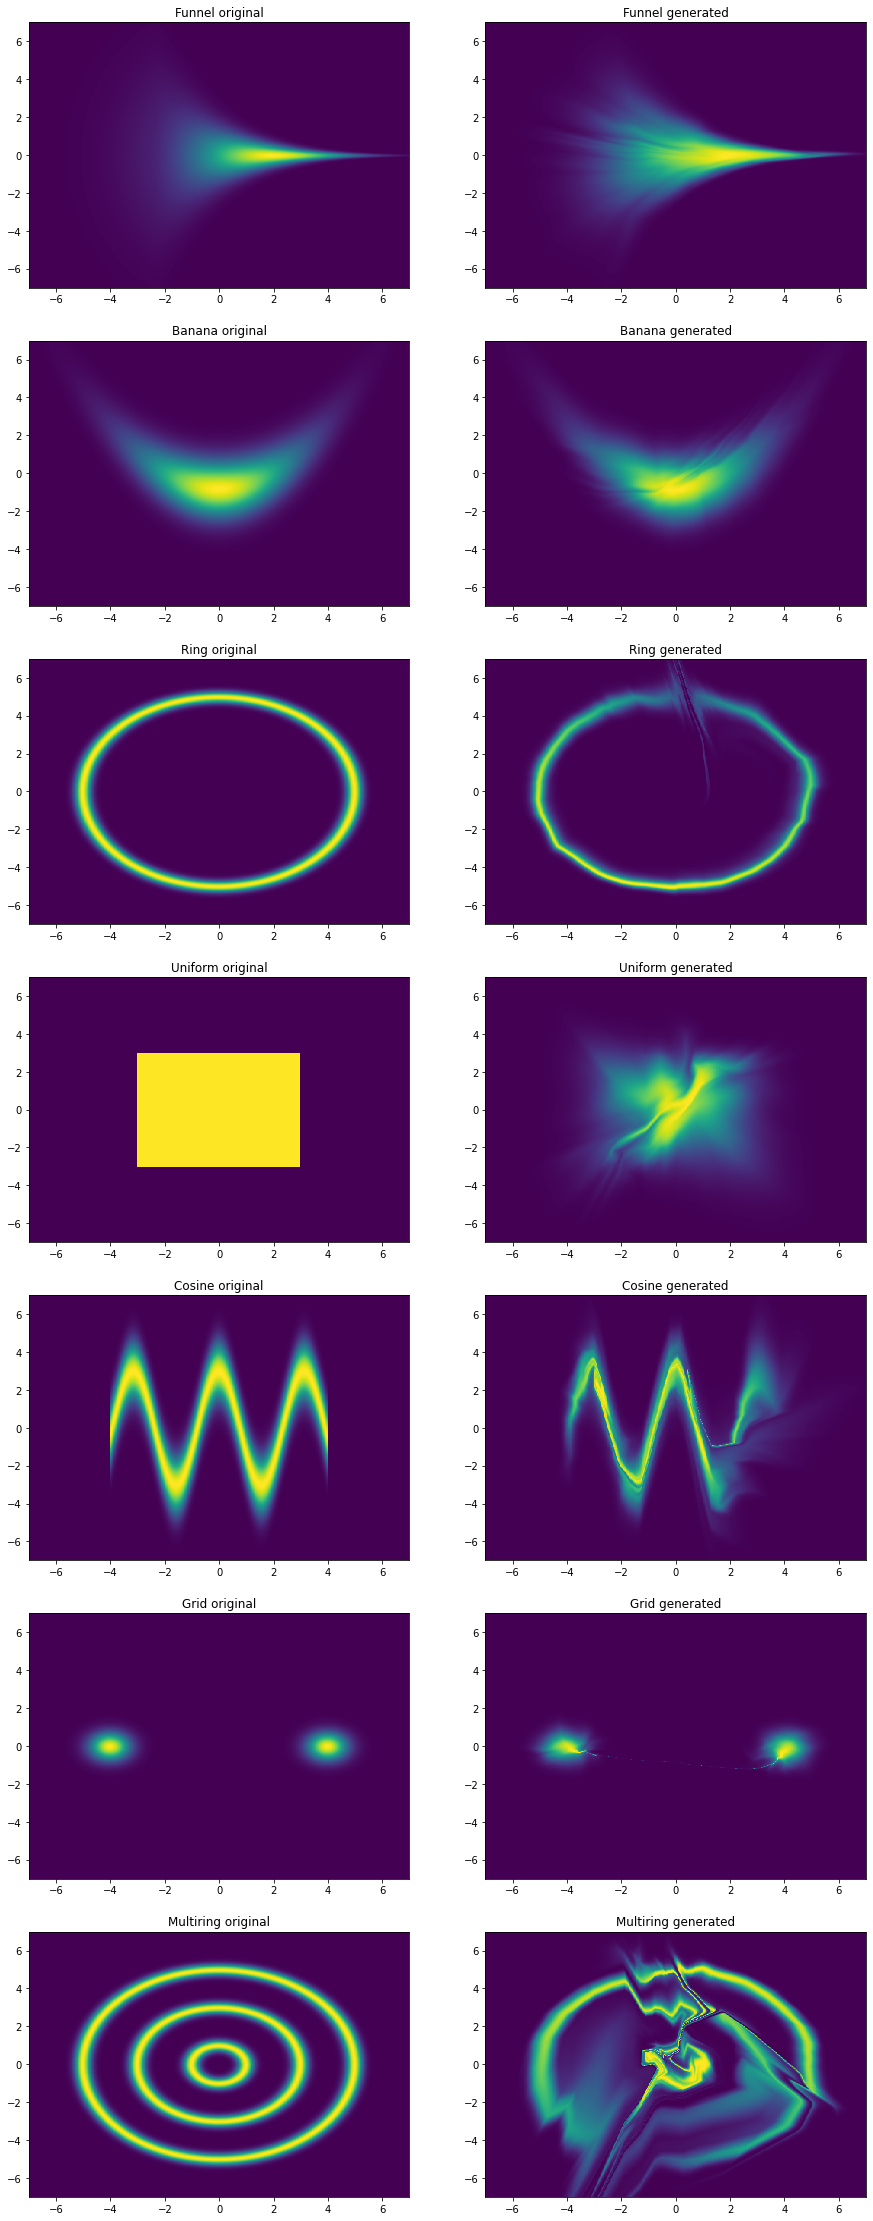

In [7]:
x_interval, y_interval = np.linspace(-7, 7, 500), np.linspace(-7, 7, 500)

plt.figure(figsize=(15, 40))
for i in range(len(names)):
    name = names[i]
    obj = objs[i]
    flow = flows[i]
    
    plt.subplot(7, 2, 2*i+1)
    plot_object2D(obj, x_interval, y_interval)
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' original')
    
    plt.subplot(7, 2, 2*i+2)
    plot_flow2D(flow, x_interval, y_interval)
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' generated')